In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cycler
from matplotlib.ticker import StrMethodFormatter
from matplotlib.axis import Axis
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
import sqlite3 as sq
from functools import reduce
#settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import sys
sys.path.append("../../Functions and Dictionaries/") # Adds higher directory to python modules path
import geodict
namestocommon = geodict.namestocommon

In [2]:
import vizfunctions2
prettypercentchange = vizfunctions2.prettypercentchange #single viz per x axis unit datalabels, active inputs: xoffset, yoffset, labelformat
percentchange = vizfunctions2.percentchange #double viz per x axis unit datalabels, active inputs: xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size
percent = vizfunctions2.percent
percentchange = vizfunctions2.percentchange
realchange = vizfunctions2.realchange

In [3]:
import changefunctions
calculate_changes = changefunctions.calculate_changes
generate_time_frames = changefunctions.generate_time_frames

In [4]:
import vizfunctions
#allheaders = vizfunctions.allheaders
#howwide = vizfunctions.howwide
tablecolors = vizfunctions.tablecolors
#allheadersmerged = vizfunctions.allheadersmerged
#makeinvisible = vizfunctions.makeinvisible
mergecells = vizfunctions.mergecells
mergemultcells = vizfunctions.mergemultcells

In [5]:
#data labels functions
def singledatalabels(xoffset, yoffset, labelformat):
    for j, k in zip(x, y):
        label = labelformat.format(k)
        plt.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset, yoffset), ha = 'center')
boxstyleinput = "round,pad=-0.060,rounding_size=0.15"
def roundedboxes(boxstyleinput):
    new_patches = []
    for patch in reversed(ax.patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),abs(bb.width), abs(bb.height),boxstyle=boxstyleinput, ec="none", fc=color, mutation_aspect=1)
        patch.remove()
        new_patches.append(p_bbox)
    for patch in new_patches:
        ax.add_patch(patch)
def howwide(width):
    ['None' for x in range(width)]
def howlong(indexlength):
    ["None" for x in range(indexlength)]
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheadersmerged(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in doublecols:
            cell.set_edgecolor(col1)
        elif cell_text in column_headers:
            cell.set_edgecolor(None)
        else:
            cell.set(edgecolor=col2)
        if cell_text in column_headers:
            cell.visible_edges = 'B'
        elif cell_text in row_headers:
            cell.visible_edges = edge2
        elif cell_text in col_names:
            cell.visible_edges = 'LR'
        if cell_text in row_headers\
        or cell_text in doublecols:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#function to make figure invisible for tables
guy1, guy2, guy3 = False, 'off', 'tight'
def makeinvisible(guy1, guy2, guy3):
    return fig.patch.set_visible(guy1), ax.axis(guy2), ax.axis(guy3)
col1, col2, edge1, edge2 = '#00263E', '#E1EFF2', 'vertical', 'horizontal'
def allheaders(col1, col2, edge1, edge2):
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text not in row_headers\
        and cell_text not in column_headers:
            cell.set_edgecolor(col1)
        else:
            cell.set(edgecolor=col2)
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in column_headers:
            cell.visible_edges = edge1
        elif cell_text in row_headers:
            cell.visible_edges = edge2
    for cell in table.get_children():
        cell_text = cell.get_text().get_text()
        if cell_text in row_headers\
        or cell_text in column_headers:
            cell.set_text_props(fontproperties=FontProperties(weight='bold'))
#stacked bar labels function
belowstackedbarlabels, abovestackedbarlabels = -5, 2
def stackedbarlabels(locationoffset):
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + bar.get_y() + locationoffset, str(float(round(bar.get_height(), 1))) + '%', ha='center')
def doubledatalabels(xoffset1, yoffset1, xoffset2, yoffset2, labelformat, size):
    for j, k in zip(xpos, y1):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset1, yoffset1), fontsize = size, ha = 'center')
    for j, k in zip(xpos, y2):
        label = labelformat.format(k)
        ax.annotate(label, (j, k), textcoords = 'offset points', xytext = (xoffset2, yoffset2), fontsize = size, ha = 'center')

In [6]:
#Set branding parameters
GNRCDARKBLUE, GNRCLIGHTBLUE, GNRCORANGE, GNRCCOOLGRAY= '#00263E', '#6DB0C7', '#EB7525', '#7B7E85'
C1, C2, C3, C4, C5, C6, C7, C8, C9 = '#314454', '#597952', '#66a141', '#0f2e39', '#dcdedf', '#797e80', '#535455', '#30523b', '#8494a4'
TABLECOL1, TABLECOL2 = '#E1EFF2', '#F4F9F9'
GNRCFONTONE, GNRCFONTTWO, GNRCFONTTHREE = 'Calibri', 'DIN Condensed', 'Palatino Linotype'
SMALLER_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE, BIGGEST_SIZE = 10, 11, 13, 18, 20
#Update the default style sheet using rcparams
plt.rcParams.update({'font.size': SMALL_SIZE, 'font.weight': 'normal', 'axes.titlesize': BIGGER_SIZE, 'axes.labelsize': MEDIUM_SIZE, 'xtick.labelsize': SMALL_SIZE, 
'ytick.labelsize': SMALL_SIZE, 'legend.fontsize': SMALL_SIZE, 'font.family': GNRCFONTONE, 'axes.facecolor': 'None', 'figure.figsize': (10, 5), 
'figure.facecolor': 'None', 'figure.edgecolor': 'None', 'figure.autolayout': True, 'figure.dpi': 500, 'axes.grid': False, 'axes.grid.which': 'major', 
'axes.axisbelow': True, 'text.color': GNRCDARKBLUE, 'axes.labelcolor': GNRCDARKBLUE, 'xtick.color': GNRCCOOLGRAY, 'ytick.color': GNRCCOOLGRAY, 
'axes.labelpad': 15, 'axes.titlepad': 20, 'grid.color': GNRCCOOLGRAY, 'grid.linestyle': '-', 'grid.alpha': '0.7', 'lines.linewidth': 1.5, 
'lines.linestyle': '-', 'lines.marker': 'o', 'legend.framealpha': 0.8, 'legend.facecolor': 'inherit', 'legend.frameon': False,
'axes.prop_cycle': cycler(color = [C1, C2, C3, C4, C5, C6, C7, C8, C9, GNRCLIGHTBLUE]), 
'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.bottom': False, 'axes.spines.left': False, 'xtick.major.size': 8, 
'xtick.minor.size': 4, 'ytick.major.size': 6, 'ytick.minor.size': 3, 'ytick.minor.size': 3})
#Settings not available in rcparams
tickaxisselection = 'both'                  #both axes have ticks
majororminortick = 'major'                  #only major ticks selected for now, although we just established a default size for the minor if we want them
linealpha = 0.8                             #no rcparam, set this as alpha for line plots
#AXIS LABEL FORMATTERS
yearformat = '{x:.0f}'                       #takes float datatype to look like a year
numbernodecimalformat = '{x:,.0f}'           #takes float datatype to a number with no decimal with commas at the thousandth
numberonedecimalformat = '{x:,.1f}'          #takes float datatype to a number with one decimal with commas at the thousandth
numbertwodecimalformat = '{x:,.2f}'          #takes float datatype to a number with two decimal with commas at the thousandth
percentformat = '{x:,.1f}%'                  #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
percentnodecimalformat = '{x:,.0f}%'         #takes float datatype to a number with one decimal with commas at the thousandth and an appended %
moneyformat = '${x:,.0f}'                    #takes float datatype to a number with no decimal with commas at the thousandth and a MONEY sign   

In [7]:
#2000
conn = sq.connect('../../Pipeline-Census-Bureau/Outputs/CensusBureau.db')
#SF12000
sql_query = pd.read_sql('SELECT * FROM [SF1_2000]', conn)
sf12000 = pd.DataFrame(sql_query)
sf12000.drop(columns = 'Source', inplace = True)
#SF32000
sql_query = pd.read_sql('SELECT * FROM [SF3_2000]', conn)
sf32000 = pd.DataFrame(sql_query)
sf32000.drop(columns = 'Source', inplace = True)
# #TIGER2000
# sql_query = pd.read_sql('SELECT * FROM [CensusBureau_TIGER_2000]', conn)
# TIGER2000 = pd.DataFrame(sql_query)
# TIGER2000.drop(columns = 'Source', inplace = True)
dfs2000 = [sf12000, sf32000]
twothousand= reduce(lambda  left,right: pd.merge(left,right,on=['NAME', 'GEO_ID'], how='outer'), dfs2000)
twothousand = twothousand.drop_duplicates()
twothousand = twothousand.drop(columns = 'GEO_ID')
twothousand = twothousand[['NAME', 'Population']]
twothousand = twothousand.set_index(['NAME'])
twothousandsuff = twothousand.add_suffix(' 2000').reset_index()
#twothousand.columns = pd.MultiIndex.from_product([twothousand.columns, [2000], ['None']])
#2010
#SF12010
sql_query = pd.read_sql('SELECT * FROM [SF1_2010]', conn)
sf12010 = pd.DataFrame(sql_query)
sf12010.drop(columns = 'Source', inplace = True)
#ACS52010
sql_query = pd.read_sql('SELECT * FROM [ACS5_2010]', conn)
ACS52010 = pd.DataFrame(sql_query)
ACS52010.drop(columns = 'Source', inplace = True)
# #TIGER2010
# sql_query = pd.read_sql('SELECT * FROM [CensusBureau_TIGER_2010]', conn)
# TIGER2010 = pd.DataFrame(sql_query)
# TIGER2010.drop(columns = 'Source', inplace = True)
dfs2010 = [sf12010, ACS52010]
twothousandten= reduce(lambda  left,right: pd.merge(left,right,on=['NAME', 'GEO_ID'], how='outer'), dfs2010)
twothousandten = twothousandten.drop_duplicates()
twothousandten = twothousandten.drop(columns = 'GEO_ID')
twothousandten = twothousandten[['NAME', 'Population']]
twothousandten = twothousandten.fillna(0)
twothousandten = twothousandten.set_index(['NAME'])
twothousandtensuff = twothousandten.add_suffix(' 2010').reset_index()
#twothousandten.columns = pd.MultiIndex.from_product([twothousandten.columns, [2010], ['None']])
#2020
#PL2020
sql_query = pd.read_sql('SELECT * FROM [PL_2020]', conn)
pl2020 = pd.DataFrame(sql_query)
pl2020.drop(columns = 'Source', inplace = True)
#TIGER2020
# sql_query = pd.read_sql('SELECT * FROM [CensusBureau_TIGER_2020]', conn)
# TIGER2020 = pd.DataFrame(sql_query)
# TIGER2020.drop(columns = 'Source', inplace = True)
dfs2020 = [pl2020]
twothousandtwenty= reduce(lambda  left,right: pd.merge(left,right,on=['NAME', 'GEO_ID'], how='outer'), dfs2020)
twothousandtwenty = twothousandtwenty.drop_duplicates()
twothousandtwenty = twothousandtwenty.drop(columns = 'GEO_ID')
twothousandtwenty = twothousandtwenty[['NAME', 'Population']]
twothousandtwenty = twothousandtwenty.fillna(0)
twothousandtwenty = twothousandtwenty.set_index(['NAME'])
twothousandtwentysuff = twothousandtwenty.add_suffix(' 2020').reset_index()
#twothousandtwenty.columns = pd.MultiIndex.from_product([twothousandtwenty.columns, [2020], ['None']])
#2023
sql_query = pd.read_sql('SELECT * FROM [PEP_SubCo]', conn)
pepsubco = pd.DataFrame(sql_query)
pepsubco = pepsubco.loc[pepsubco['Year'] == '2023']
pepsubco = pepsubco[['NAME', 'Population']]
pepsubco['NAME'] = pepsubco['NAME'].replace({'Balance of Wilson County, Tennessee': 'Wilson Unincorporated'})
sql_query = pd.read_sql('SELECT * FROM [PEP]', conn)
pepco = pd.DataFrame(sql_query)
pepco = pepco.loc[pepco['Year'] == '2023']
pepco = pepco[['NAME', 'Population']]
dfs2023 = [pepsubco, pepco]
twothousandtwentythree = pd.concat(dfs2023)
twothousandtwentythree = twothousandtwentythree.drop_duplicates()
twothousandtwentythree = twothousandtwentythree.fillna(0)
twothousandtwentythree = twothousandtwentythree.set_index(['NAME'])
twothousandtwentythreesuff = twothousandtwentythree.add_suffix(' 2023').reset_index()


In [8]:
geos = ['Wilson Unincorporated', 
        #'Wilson Incorporated', 
        'Wilson County', 'Tennessee', 'GNRC', 
        'Mount Juliet', 'Lebanon', 'Watertown']

In [9]:
dfs = [twothousandsuff, twothousandtensuff, twothousandtwentysuff, twothousandtwentythreesuff]
dfsuff = reduce(lambda  left,right: pd.merge(left,right, on = ['NAME'], how='outer'), dfs)

In [10]:
dfsuff = dfsuff.reset_index().set_index('NAME').transpose()
dfsuff = dfsuff.rename(columns = namestocommon)
dfsuff = dfsuff[geos]
dfsuff = dfsuff.transpose().reset_index()

In [11]:
cols = list(dfsuff.columns)
cols.remove('NAME')
#cols.remove('GEO_ID')
dfsuff[cols] = dfsuff[cols].astype(float)
dfsuff = dfsuff.drop_duplicates()

In [12]:
dfsuff

,NAME,index,Population 2000,Population 2010,Population 2020,Population 2023
0,Wilson Unincorporated,197.0,54850.0,62655.0,68464.0,71045.0
1,Wilson County,94.0,88809.0,113993.0,147737.0,163674.0
2,Tennessee,155.0,5689283.0,6346105.0,6910840.0,7126489.0
3,GNRC,170.0,1411725.0,1722648.0,2089918.0,2185289.0
4,Mount Juliet,129.0,12366.0,23671.0,39289.0,42912.0
5,Lebanon,125.0,20235.0,26190.0,38431.0,48112.0
6,Watertown,148.0,1358.0,1477.0,1553.0,1605.0


In [13]:
twothousand.columns = pd.MultiIndex.from_product([twothousand.columns, [2000], ['None']])
twothousandten.columns = pd.MultiIndex.from_product([twothousandten.columns, [2010], ['None']])
twothousandtwenty.columns = pd.MultiIndex.from_product([twothousandtwenty.columns, [2020], ['None']])
twothousandtwentythree.columns = pd.MultiIndex.from_product([twothousandtwentythree.columns, [2023], ['None']])

In [14]:
#all years tidy
dfs = [twothousand, twothousandten, twothousandtwenty, twothousandtwentythree]
dftidy = reduce(lambda  left,right: pd.merge(left,right,on=['NAME'], how='outer'), dfs)
dftidy = dftidy.reset_index().set_index('NAME').transpose()
dftidy = dftidy.rename(columns = namestocommon)
dftidy = dftidy[geos]
dftidy = dftidy.transpose().reset_index()
dftidy = dftidy.drop_duplicates()

In [15]:
years = [2000, 2010, 2020, 2023]
time_frames = generate_time_frames(years)

In [16]:
time_frames

['2000-2010', '2000-2020', '2000-2023', '2010-2020', '2010-2023', '2020-2023']

In [17]:
value_counts = dftidy.columns.get_level_values(0).value_counts()
first_level = value_counts[value_counts == 4].index.tolist()
#remove percentages - don't want change metrics on them
first_level = [item for item in first_level if '%' not in item]

In [18]:
#pass the dataframe, the list of variables, time frames, and years through the "calculate change" function
dftidy = calculate_changes(dftidy, first_level, time_frames = time_frames, years = years)
#dftidy['GEO_ID'] = 'GHold'
dftidy = dftidy.set_index(['NAME'])

In [19]:
#reformat and rename columns
dftidy = dftidy.stack([1, 1])
dftidy = dftidy.reset_index(drop = False)
dftidy = dftidy.rename(columns = {'level_1':'Year', 'level_2':'Time Frame'})

In [20]:
dftidy = dftidy.set_index('NAME').transpose()
dftidy = dftidy.rename(columns = namestocommon)
dftidy = dftidy[geos]
dftidy = dftidy.transpose().reset_index()
dftidy['Year'] = dftidy['Year'].replace({'None': 0})

In [21]:
dftidy['Time Frame'].unique()

array(['None', '2000-2010', '2000-2020', '2000-2023', '2010-2020',
       '2010-2023', '2020-2023'], dtype=object)

In [22]:
cols = list(dftidy.columns)
#cols.remove("GEO_ID")
cols.remove('Time Frame')
cols.remove('NAME')
dftidy[cols] = dftidy[cols].astype(float)

In [23]:
#set primary geo for colors
primarygeo = 'Wilson Unincorporated'
county = 'Wilson County'
#quick geo filters
reggeos = dftidy.loc[(dftidy['NAME'] == 'Wilson Unincorporated')|(dftidy['NAME'] == 'Wilson County')|
                     (dftidy['NAME'] == 'Tennessee')|(dftidy['NAME'] == 'GNRC')|(dftidy['NAME'] == 'Lebanon')|
                     (dftidy['NAME'] == 'Mount Juliet')|(dftidy['NAME'] == 'Watertown')].reset_index(drop = True)
reggeost = dfsuff.loc[(dfsuff['NAME'] == 'Wilson Unincorporated')|(dfsuff['NAME'] == 'Wilson County')|
                      (dfsuff['NAME'] == 'Tennessee')|(dfsuff['NAME'] == 'GNRC')|(dfsuff['NAME'] == 'Lebanon')|(dfsuff['NAME'] == 'Mount Juliet')|
                      (dfsuff['NAME'] == 'Watertown')].reset_index(drop = True)
Primary = dftidy.loc[dftidy['NAME'] == 'Wilson Unincorporated']
Primaryt = dfsuff.loc[dfsuff['NAME'] == 'Wilson Unincorporated']
County = dftidy.loc[dftidy['NAME'] == 'Wilson County']
Countyt = dfsuff.loc[dfsuff['NAME'] == 'Wilson County']
state = 'Tennessee'
State = dftidy.loc[dftidy['NAME'] == 'Tennessee']
region = 'GNRC'
Region = dftidy.loc[dftidy['NAME'] == 'GNRC']
MountJuliet = dftidy.loc[dftidy['NAME'] == 'Mount Juliet']
MountJuliett = dfsuff.loc[dfsuff['NAME'] == 'Mount Juliet']
Lebanon = dftidy.loc[dftidy['NAME'] == 'Lebanon']
Lebanont = dfsuff.loc[dfsuff['NAME'] == 'Lebanon']
Watertown = dftidy.loc[dftidy['NAME'] == 'Watertown']
Watertownt = dfsuff.loc[dfsuff['NAME'] == 'Watertown']
Tennessee = dftidy.loc[dftidy['NAME'] == 'Tennessee']
Tennesseet = dfsuff.loc[dfsuff['NAME'] == 'Tennessee']
GNRC = dftidy.loc[dftidy['NAME'] == 'GNRC']
GNRC = dfsuff.loc[dfsuff['NAME'] == 'GNRC']

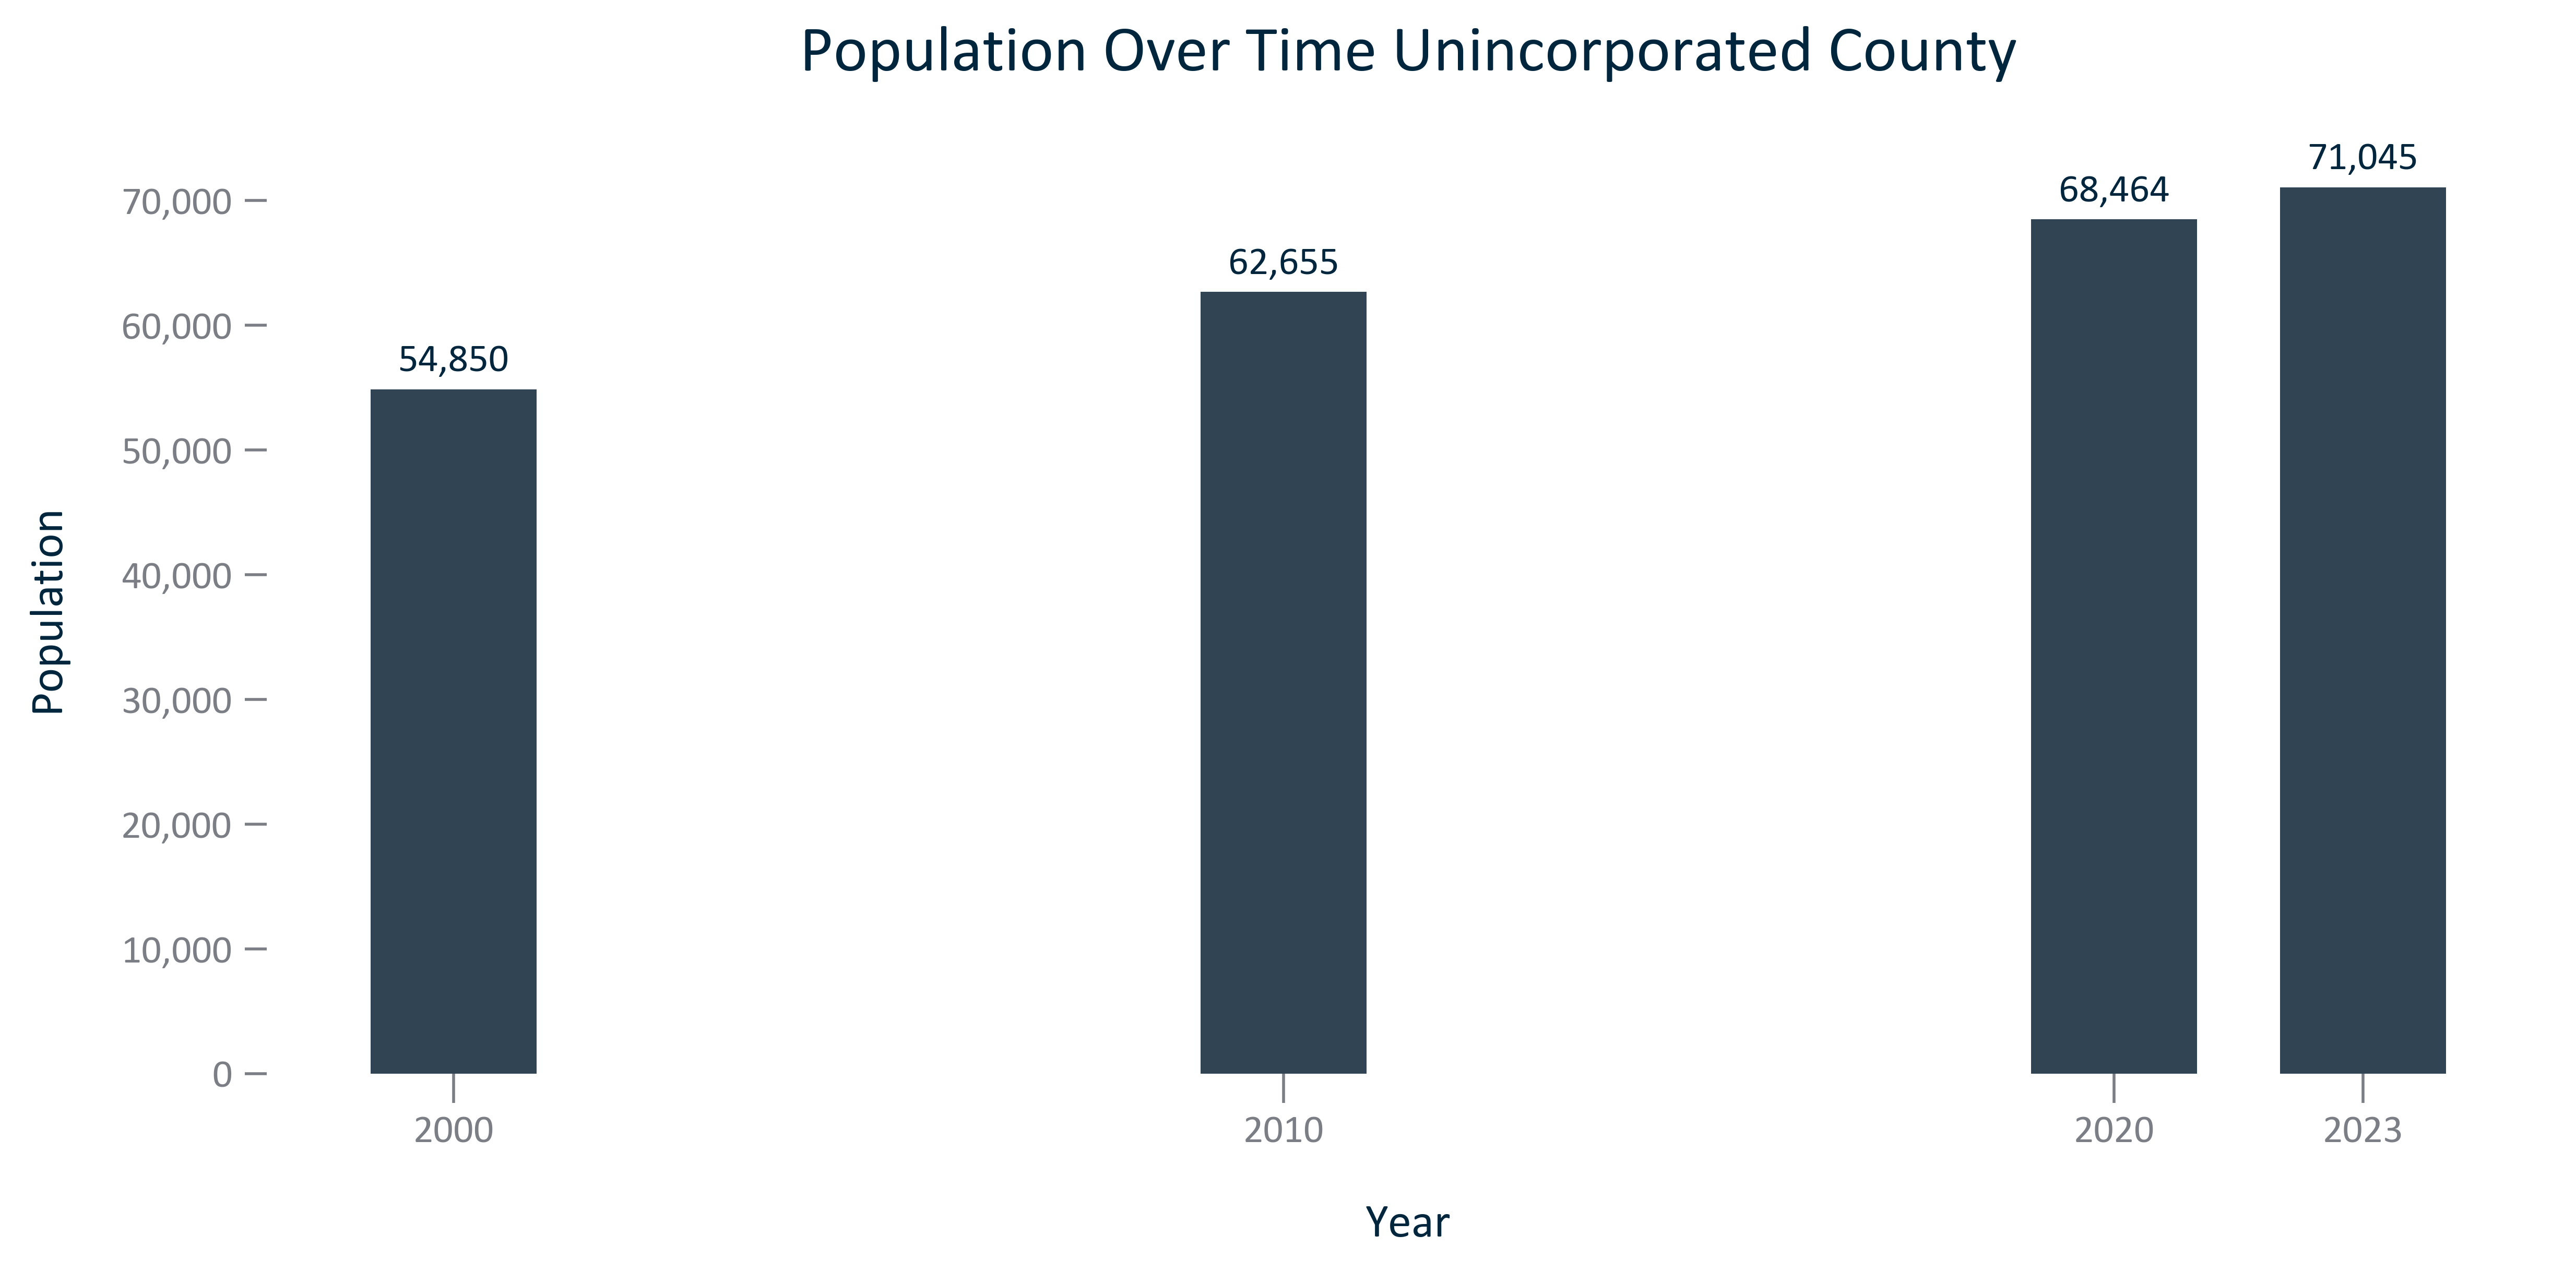

In [24]:
title = 'Population Over Time Unincorporated County'
df_temp = Primary.loc[Primary['Time Frame'] == 'None']
df_temp = df_temp.loc[df_temp['Population'].notnull()]
df_temp = df_temp[['NAME', 'Year', 'Population']]
xinput = 'Year'
yinput = 'Population'
xlabel = xinput
ylabel = yinput
x = df_temp[xinput]
y = df_temp[yinput]
#initiate figure and set parameters
fig, ax = plt.subplots()
ax.bar(x, y, width = 2) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
labels = ['2000', '2010', '2020', '2023']
plt.xticks(x, labels)
#data labels
singledatalabels(0, 5, "{:,.0f}")
#display and save
fig.savefig('../Figures/POP_bar_primarygeo_population_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_bar_primarygeo_population_overtime.png', bbox_inches='tight')
with open('../Figures/POP_bar_primarygeo_population_overtime.txt', 'w') as text_file:
    text_file.write('Citation: 2000, 2010, and 2020 Decennial Census, 2023 Population Estimates')
plt.show()
plt.close();

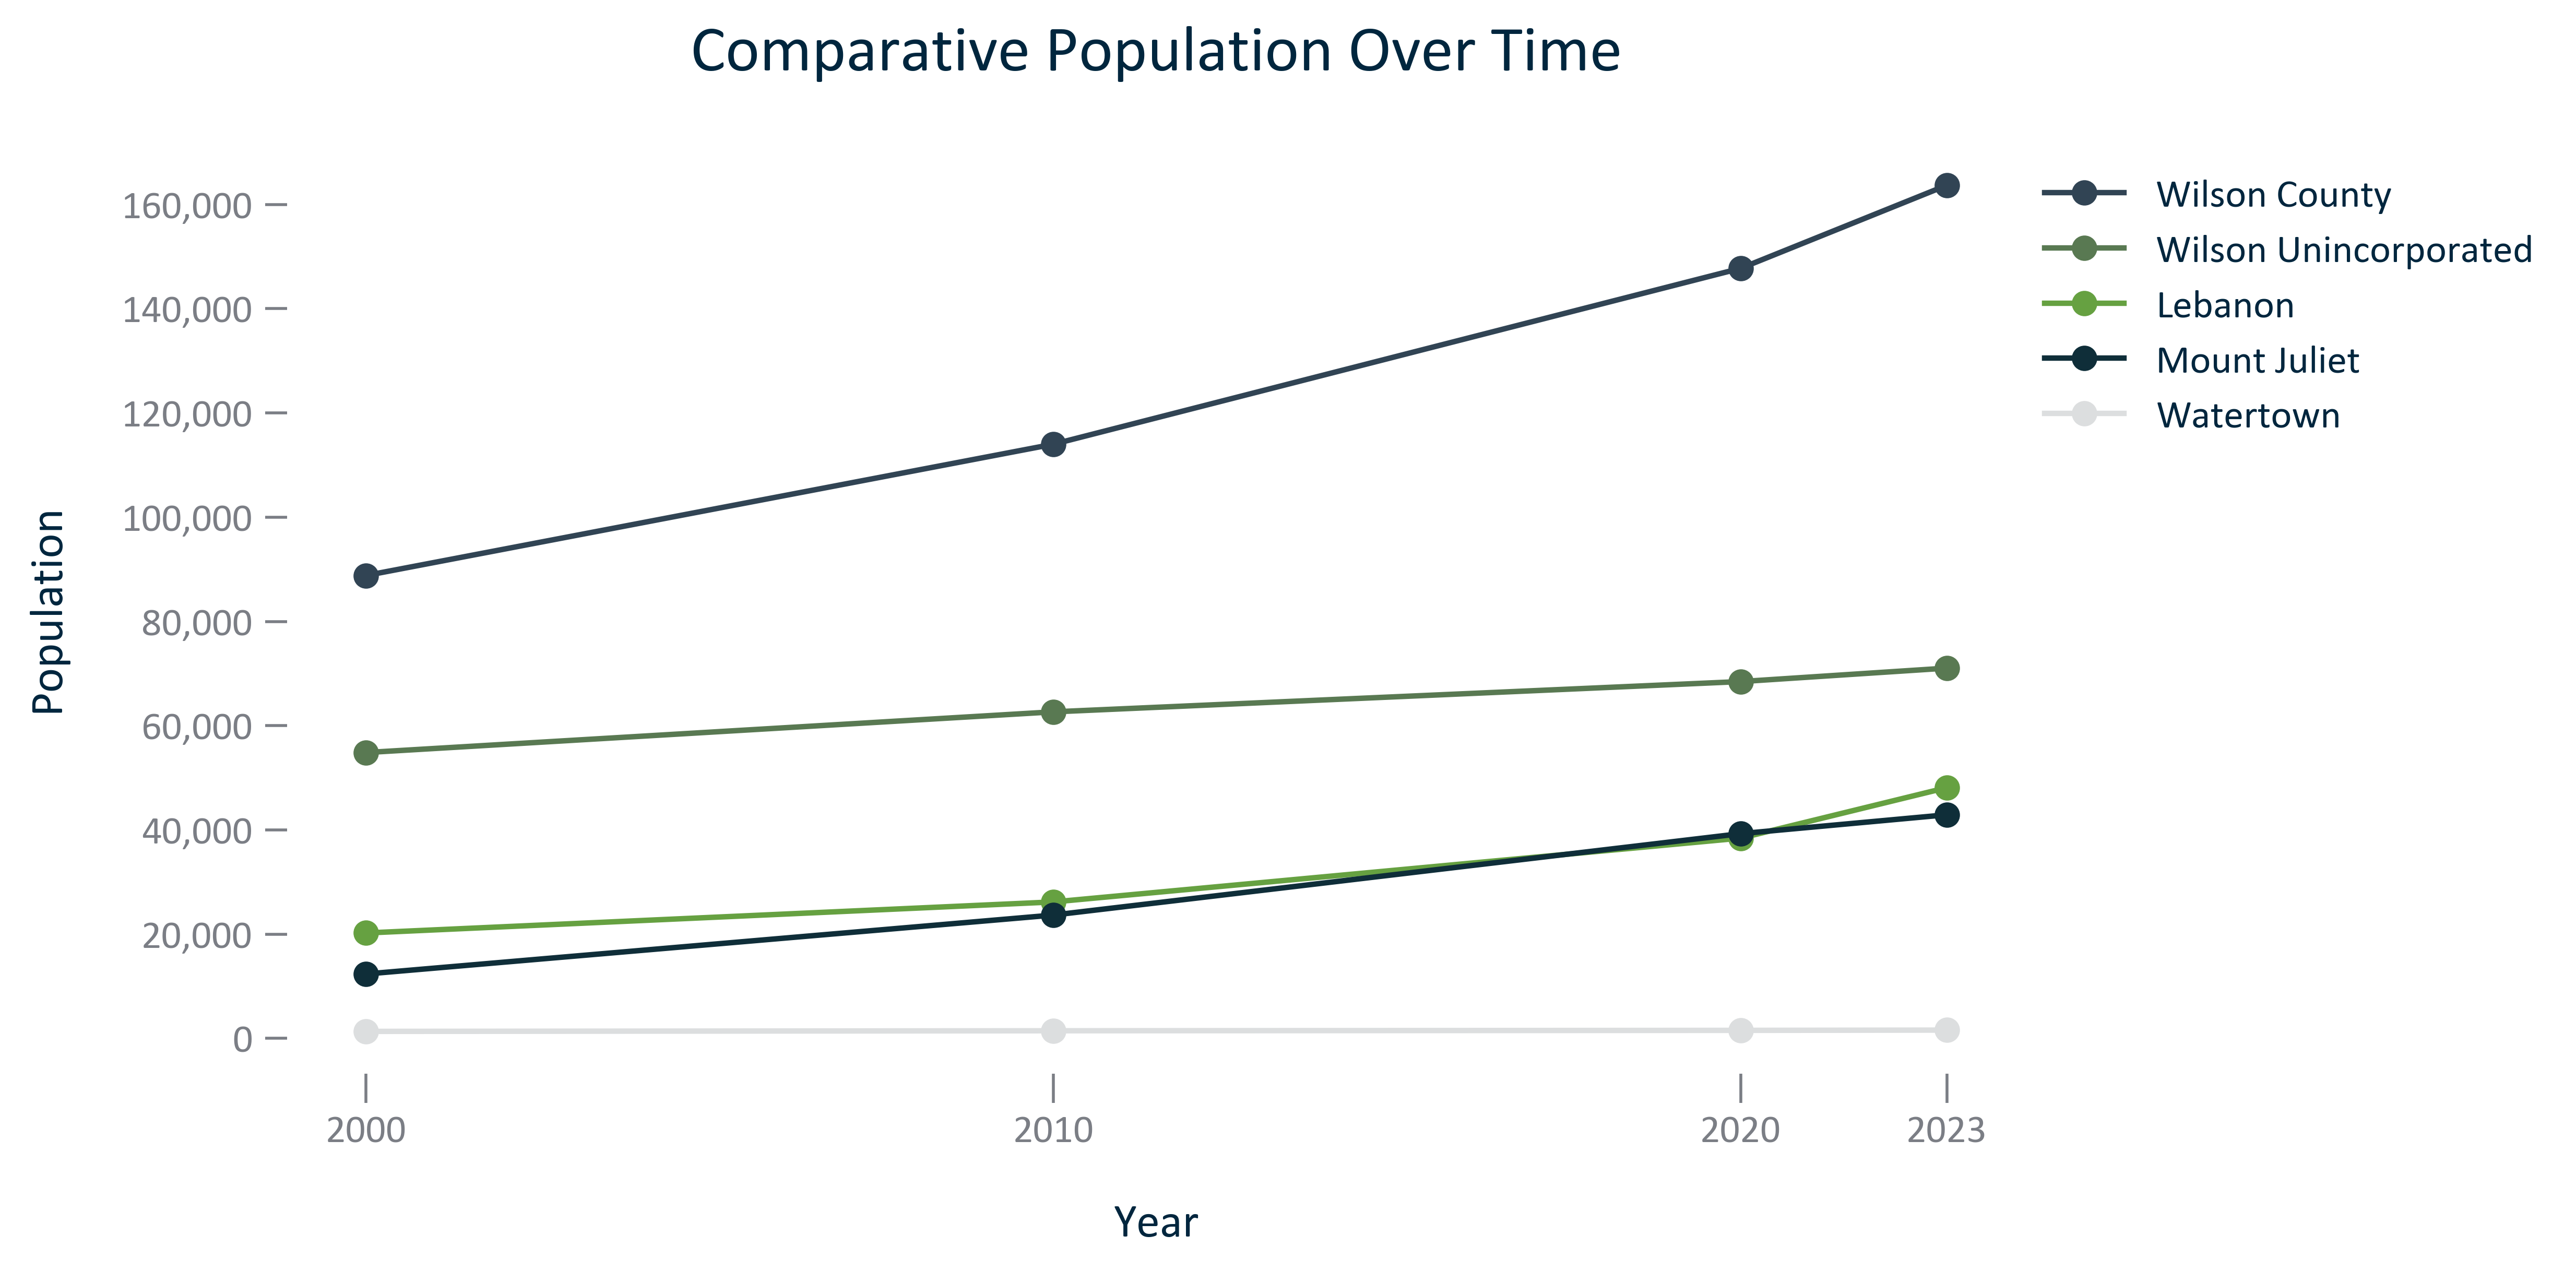

In [25]:
title = 'Comparative Population Over Time'
#set up temporary dataframe
xinput = 'Year'
yinput = 'Population'
df_tempfirst = Primary.loc[Primary['Year'] != 0.0]
linelabelfirst = str(df_tempfirst['NAME'].values[0])
xfirst = df_tempfirst[xinput]
yfirst = df_tempfirst[yinput]
df_tempex = County.loc[County['Year'] != 0.0]
linelabelex = str(df_tempex['NAME'].values[0])
xex = df_tempex[xinput]
yex = df_tempex[yinput]
df_temp2 = Lebanon.loc[Lebanon['Year'] != 0.0]
linelabel2 = str(df_temp2['NAME'].values[0])
x2 = df_temp2[xinput]
y2 = df_temp2[yinput]
df_temp3 = MountJuliet.loc[MountJuliet['Year'] != 0.0]
linelabel3 = str(df_temp3['NAME'].values[0])
x3 = df_temp3[xinput]
y3 = df_temp3[yinput]
df_temp4 = Watertown.loc[Watertown['Year'] != 0.0]
linelabel4 = str(df_temp4['NAME'].values[0])
x4 = df_temp4[xinput]
y4 = df_temp4[yinput]

#initiate figure and add lines and parameters
fig, ax = plt.subplots()
ax.plot(xex, yex, label = linelabelex)
ax.plot(xfirst, yfirst, label = linelabelfirst)
ax.plot(x2, y2, label = linelabel2)
ax.plot(x3, y3, label = linelabel3)
ax.plot(x4, y4, label = linelabel4)

ax.set(title = title, xlabel = xinput, ylabel = yinput)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(numbernodecimalformat)) #y axis formatting
labels = ['2000', '2010', '2020', '2023']
plt.xticks(x, labels)
ax.legend(bbox_to_anchor=(0.99, 1), loc='upper left')
#display and save
fig.savefig('../Figures/POP_line_geocomparative_population_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_line_geocomparative_population_overtime.png', bbox_inches='tight')
with open('../Figures/POP_line_geocomparative_population_overtime.txt', 'w') as text_file:
    text_file.write('Citation: 2000, 2010, and 2020 Decennial Census, 2023 Population Estimates')
plt.show()
plt.close();

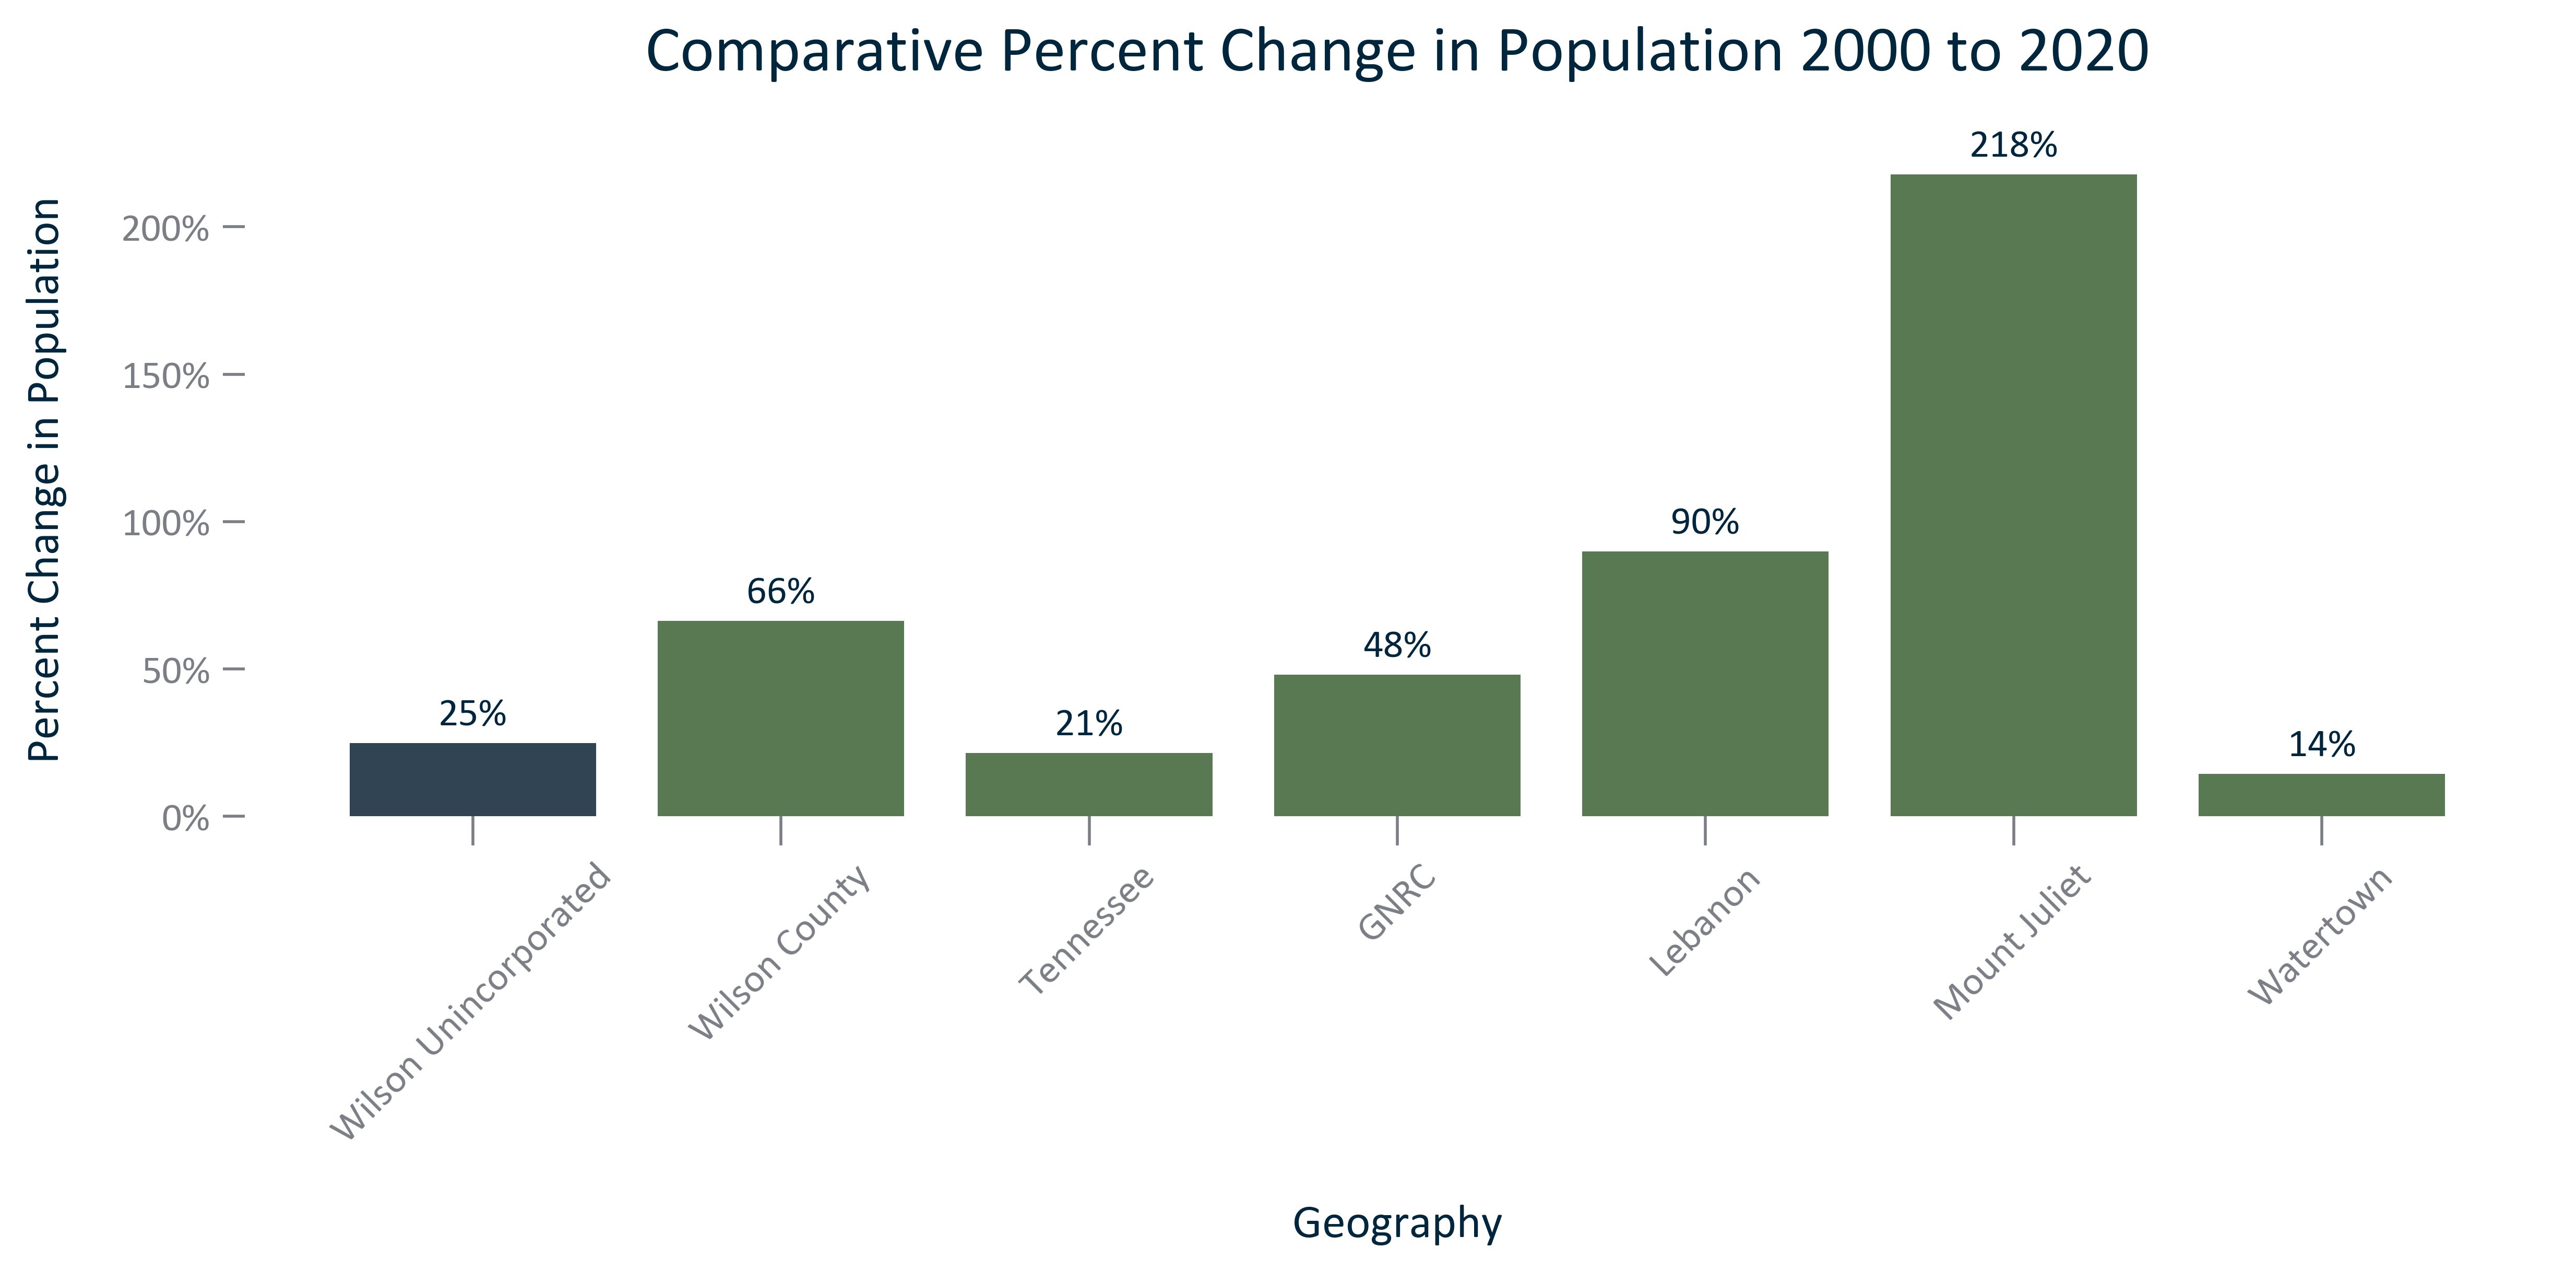

In [26]:
title = 'Comparative Percent Change in Population 2000 to 2020'
df_temp = reggeos
df_temp = df_temp.loc[(df_temp['Time Frame'] == '2000-2020')].sort_values(by = 'NAME', ascending = True).set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(primarygeo)
newcols.remove(county)
newcols.remove(state)
newcols.remove(region)
newcols = [region] + newcols
newcols = [state] + newcols
newcols = [county] + newcols
newcols = [primarygeo] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
x = df_temp['NAME']
y = df_temp['Population % Change']
xlabel = 'Geography'
ylabel = 'Percent Change in Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != primarygeo else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45) #set 
#data labels
singledatalabels(0, 5, "{:,.0f}%")
#display and save
fig.savefig('../Figures/POP_bar_geocomparative_populationchange_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_bar_geocomparative_populationchange_overtime.png', bbox_inches='tight')
with open('../Figures/POP_bar_geocomparative_populationchange_overtime.txt', 'w') as text_file:
    text_file.write('Citation: 2000 and 2020 Decennial Census')
plt.show()
plt.close();

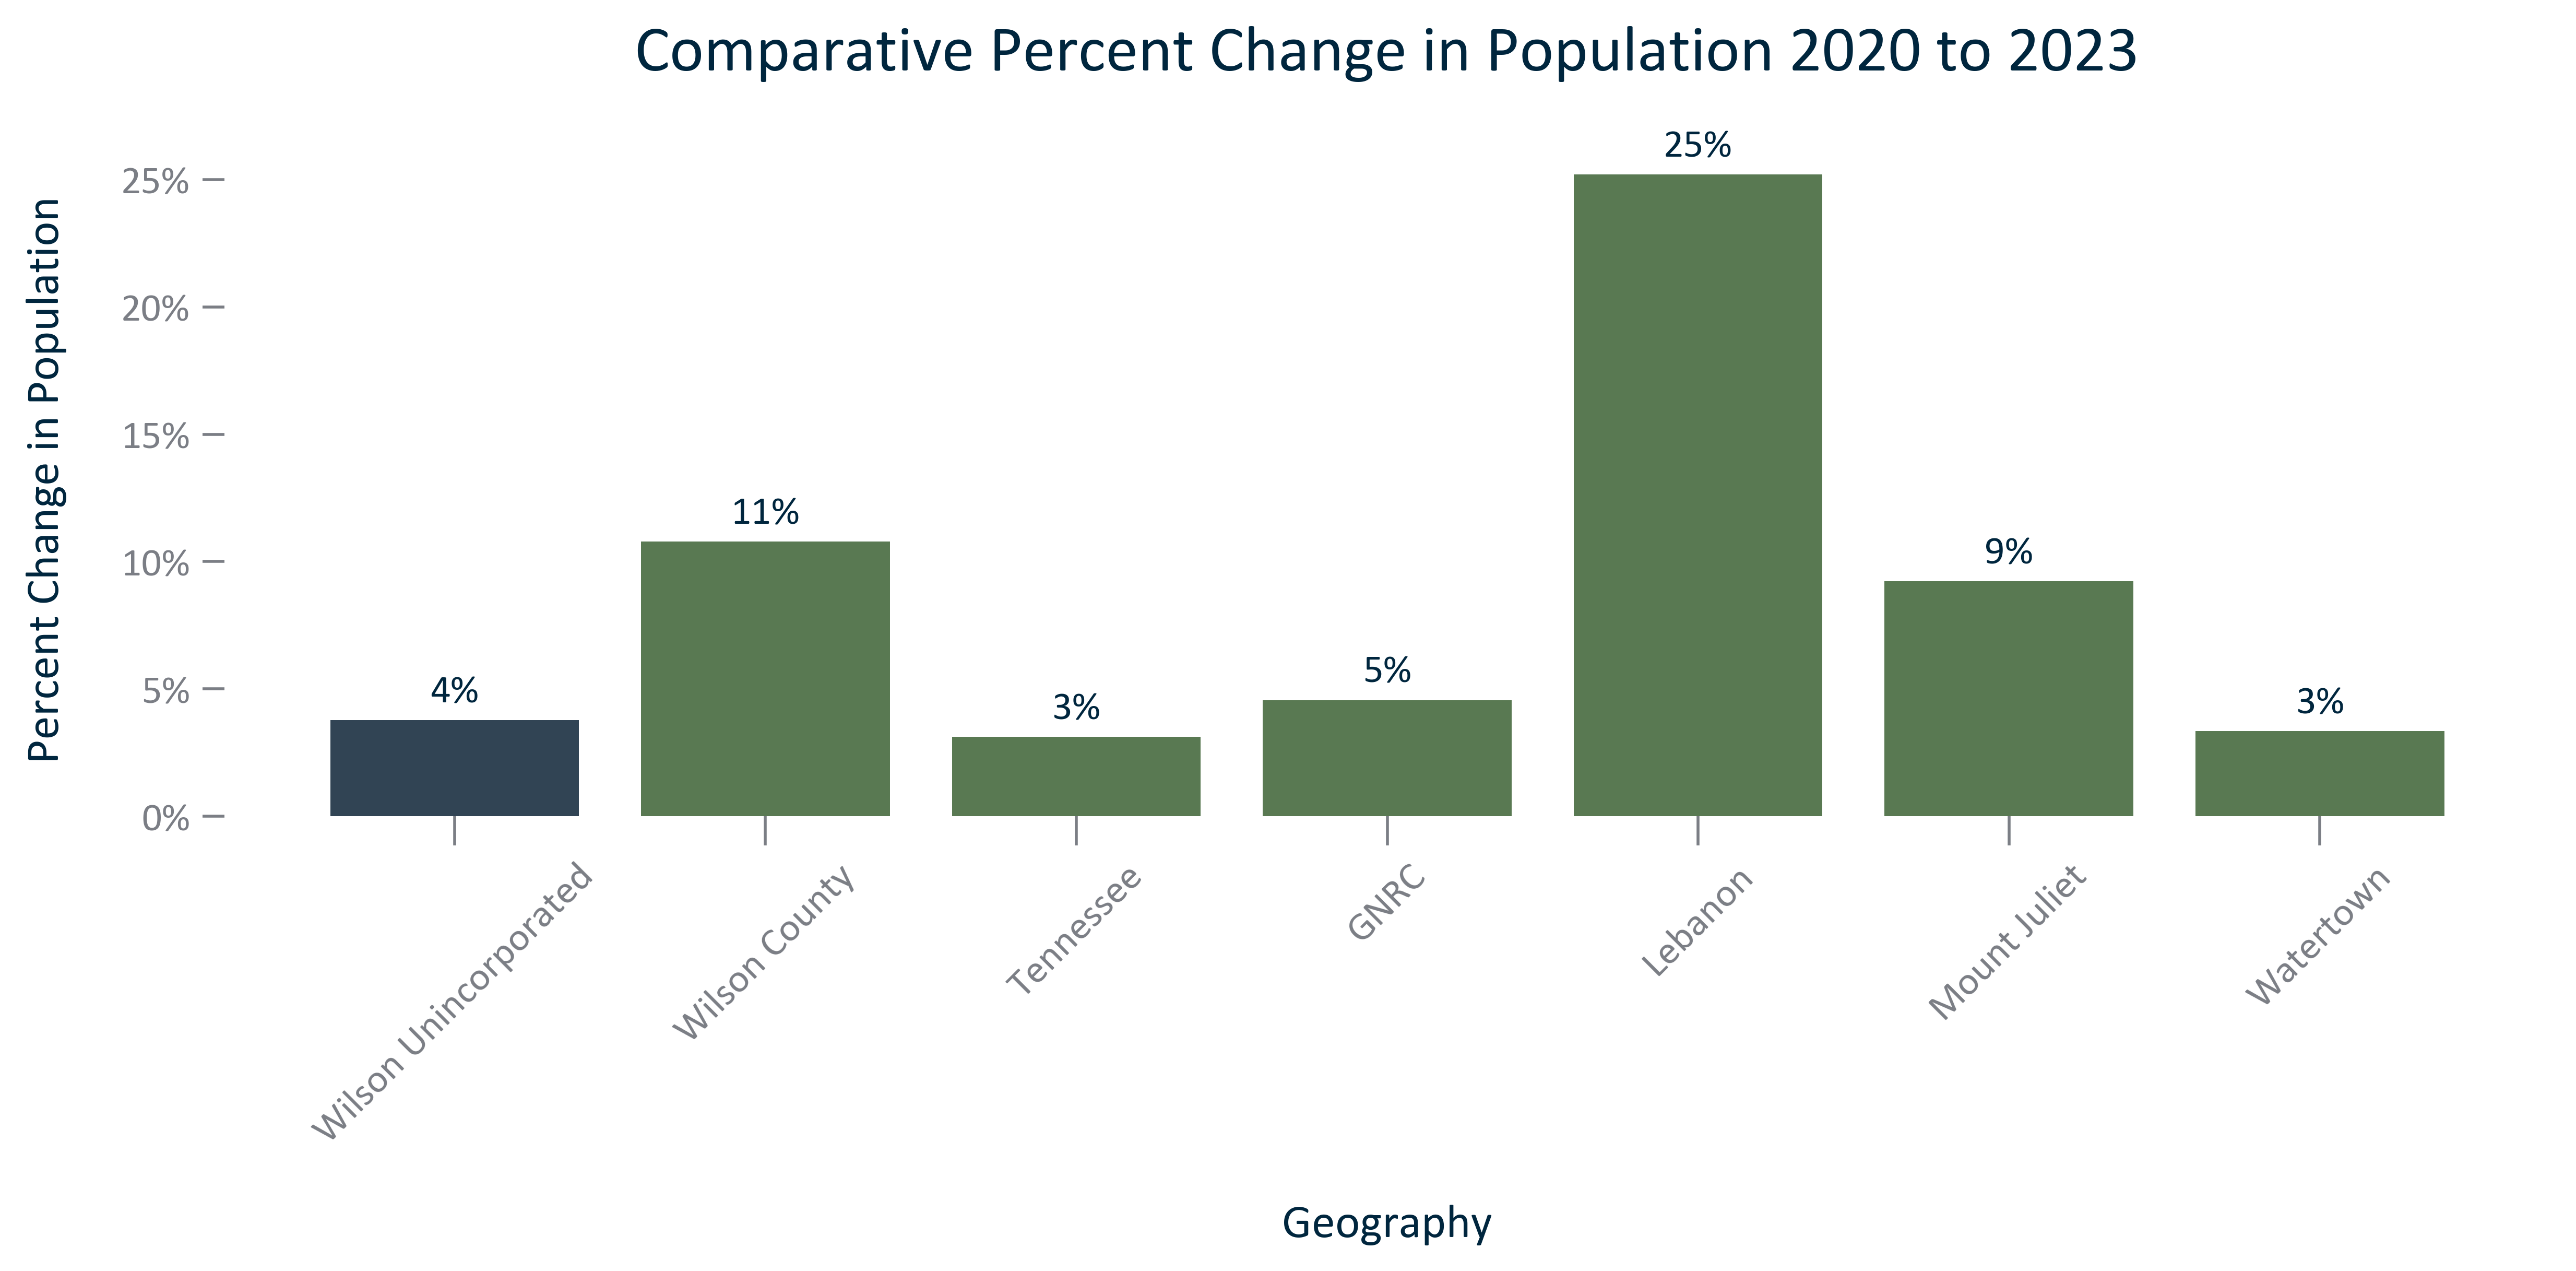

In [27]:
title = 'Comparative Percent Change in Population 2020 to 2023'
df_temp = reggeos
df_temp = df_temp.loc[(df_temp['Time Frame'] == '2020-2023')].sort_values(by = 'NAME', ascending = True).set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(primarygeo)
newcols.remove(county)
newcols.remove(state)
newcols.remove(region)
newcols = [region] + newcols
newcols = [state] + newcols
newcols = [county] + newcols
newcols = [primarygeo] + newcols
df_temp = df_temp.reindex(newcols).reset_index(drop = False)
x = df_temp['NAME']
y = df_temp['Population % Change']
xlabel = 'Geography'
ylabel = 'Percent Change in Population'
#initiate figure and set parameters
fig, ax = plt.subplots()
bar_color = [C2 if i != primarygeo else C1 for i in x]
ax.bar(x, y, color = bar_color) 
ax.set(title = title, xlabel = xlabel, ylabel = ylabel) #set the title and axes labels
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter(percentnodecimalformat)) #y axis formatting
ax.tick_params(axis = 'x', which = 'major', rotation = 45) #set 
#data labels
singledatalabels(0, 5, "{:,.0f}%")
#display and save
fig.savefig('../Figures/POP_bar_geocomparative_populationchange_recent.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_bar_geocomparative_populationchange_recent.png', bbox_inches='tight')
with open('../Figures/POP_bar_geocomparative_populationchange_recent.txt', 'w') as text_file:
    text_file.write('Citation: 2020 Decennial Census and 2023 Population Estimate')
plt.show()
plt.close();

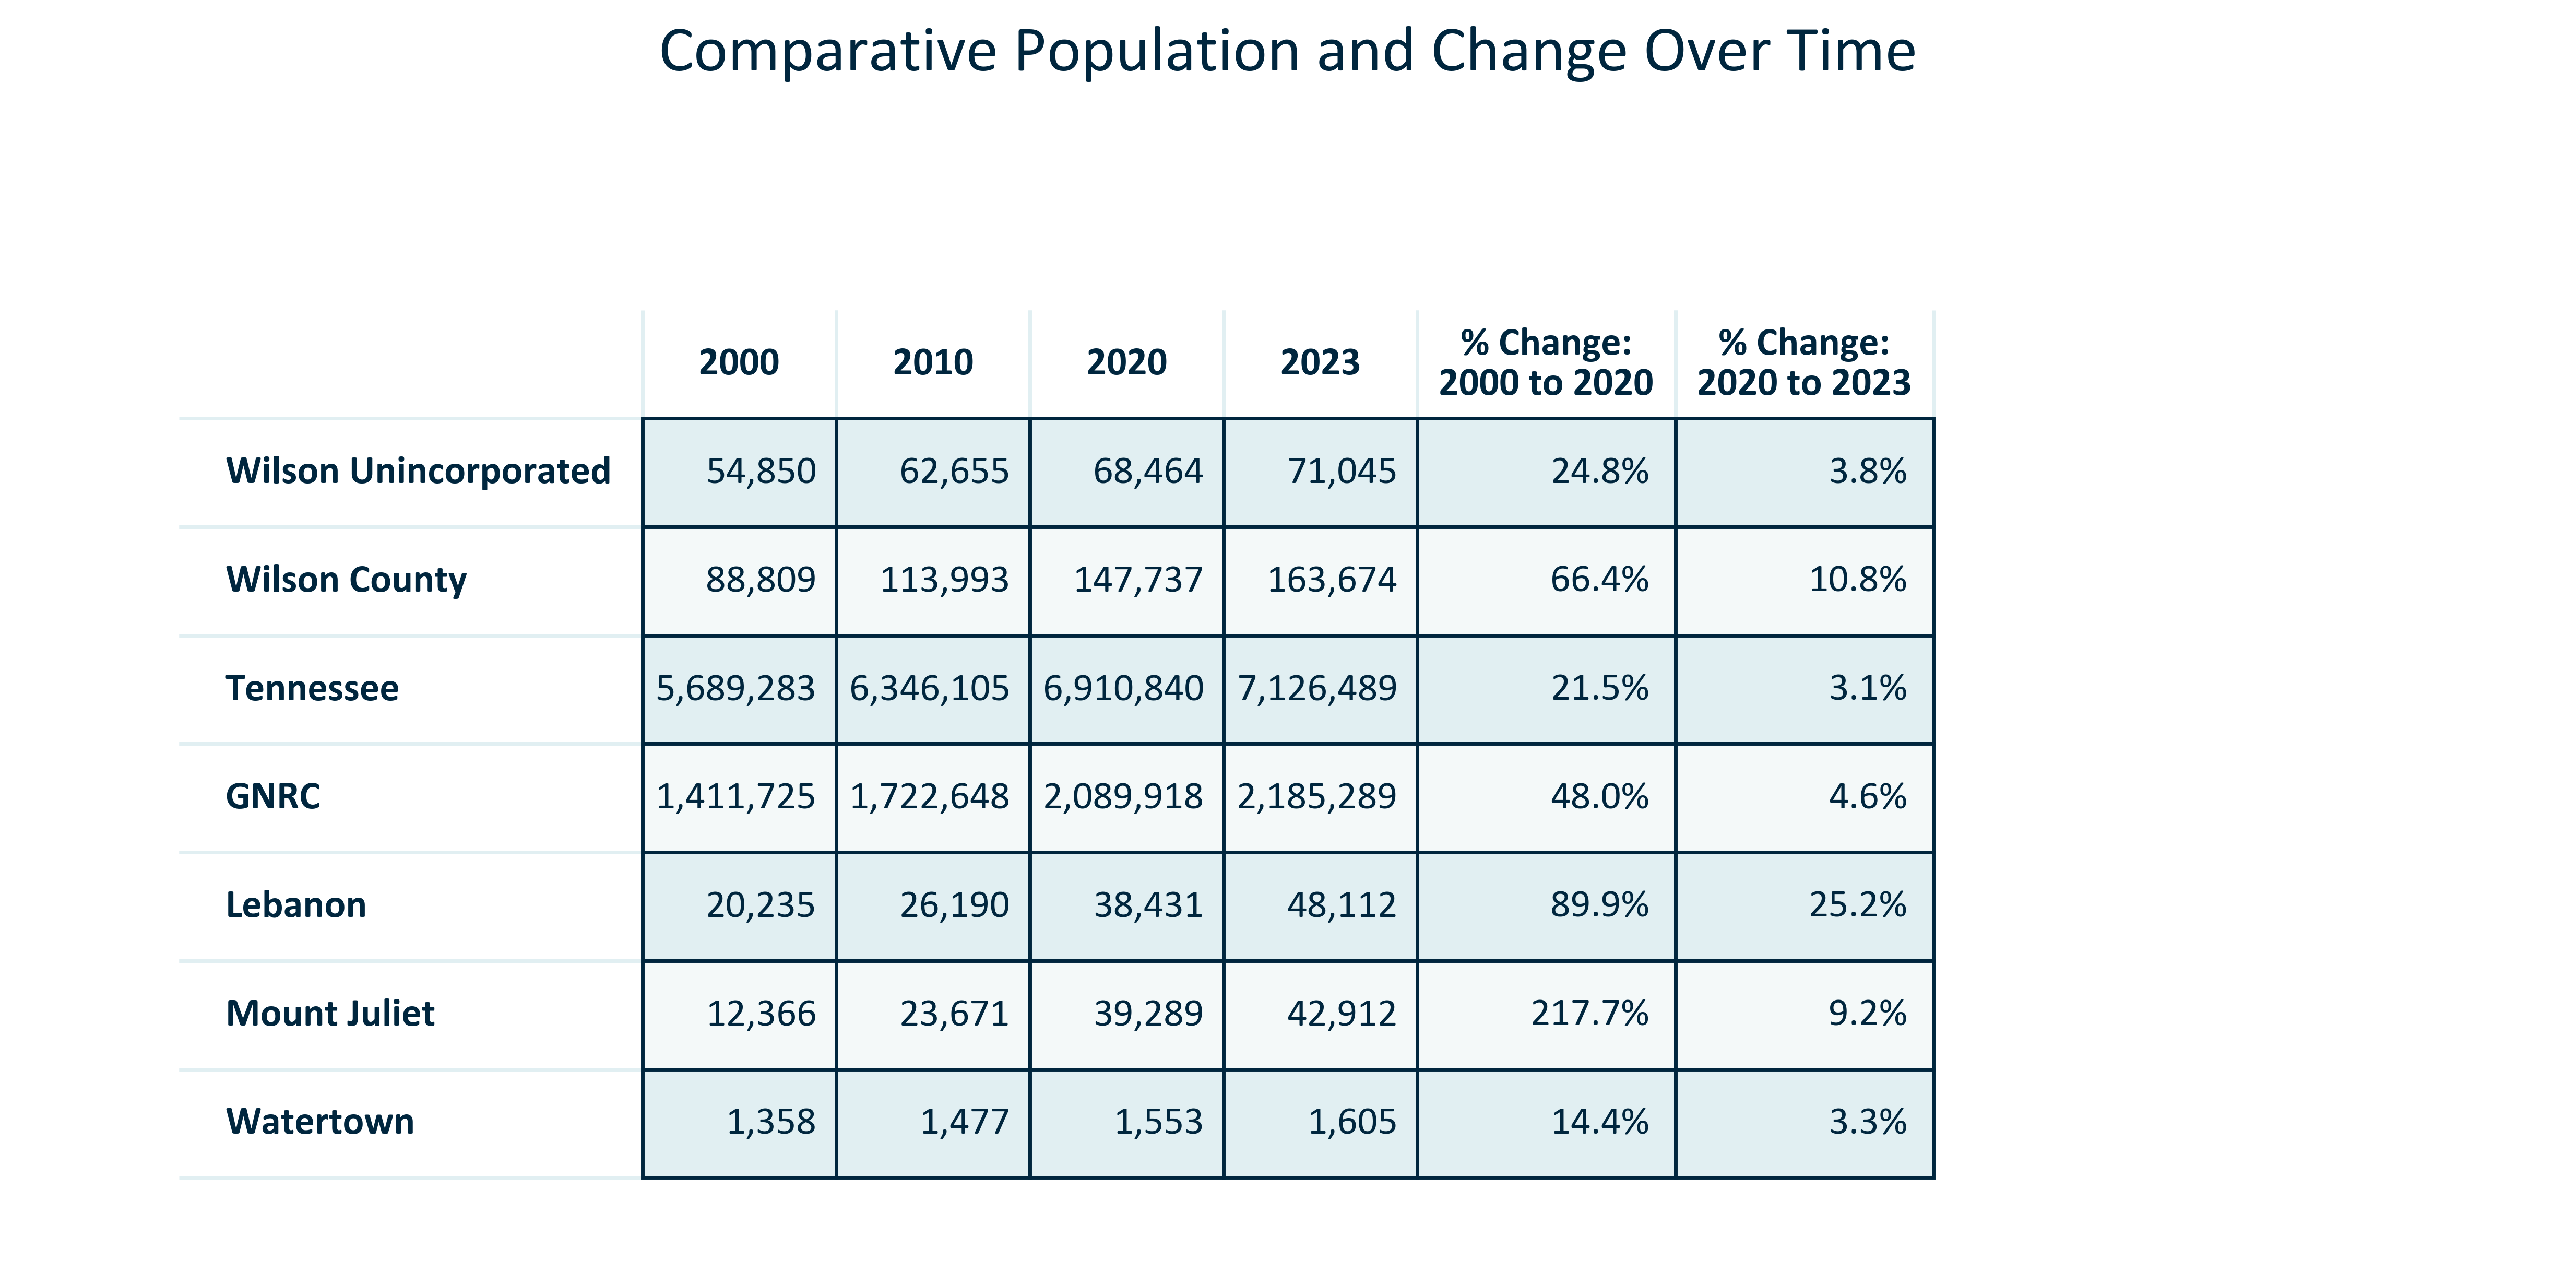

In [28]:
#POP_TABLE
#REGULAR GEOGRAPHIES, POPULATION OVER TIME, % CHANGE BETWEEN FIRST AND LAST YEAR/SECOND AND LAST YEAR
title = 'Comparative Population and Change Over Time'
#set up temporary dataframe
df_temp = reggeost
df_temp = df_temp.sort_values(by = 'NAME', ascending = True).set_index('NAME')
newcols = list(df_temp.index)
newcols.remove(primarygeo)
newcols.remove(county)
newcols.remove(state)
newcols.remove(region)
newcols = [region] + newcols
newcols = [state] + newcols
newcols = [county] + newcols
newcols = [primarygeo] + newcols
df_temp = df_temp.reindex(newcols)#.reset_index(drop = False)
df_temp = df_temp[['Population 2000', 'Population 2010', 'Population 2020', 'Population 2023']]
df_temp['% Change:\n2000 to 2020'] = prettypercentchange(df_temp['Population 2020'], df_temp['Population 2000'])
df_temp['% Change:\n2020 to 2023'] = prettypercentchange(df_temp['Population 2023'], df_temp['Population 2020'])
df_temp.update(df_temp[['Population 2000', 'Population 2010', 'Population 2020', 'Population 2023']].applymap('{:,.0f}'.format))
df_temp = df_temp.rename(columns = {'Population 2000': '  2000  ', 'Population 2010': '  2010  ', 
                                    'Population 2020': '  2020  ', 'Population 2023': '  2023  '})
df_temp = df_temp.replace({'nan%':'-', 'inf%':'-'})

#set up table
indexlength = len(df_temp.index)
width = len(df_temp.columns)
colours = tablecolors(indexlength, width)
colcolours = howwide(width)
rowcolours = howlong(indexlength)
#initiate figure and hide axes
fig, ax = plt.subplots()
makeinvisible(guy1, guy2, guy3)
#initiate table and set parameters
table = ax.table(cellText = df_temp.values, colLabels = df_temp.columns, rowLabels = df_temp.index, loc = 'center', 
                 cellColours = colours, colColours = colcolours, cellLoc = 'right', rowLoc = 'left', rowColours = rowcolours)
ax.set_title(label = title, y = 1.1)
row_headers = df_temp.index
column_headers = df_temp.columns
allheaders(col1, col2, edge1, edge2)
table.scale(2, 2.5)
table.auto_set_column_width(col=list(range(len(df_temp.columns))))
#display and save
fig.savefig('../Figures/POP_table_geocomparative_population_overtime.svg', bbox_inches='tight')
fig.savefig('../Figures/POP_table_geocomparative_population_overtime.png', bbox_inches='tight')
with open('../Figures/POP_table_geocomparative_population_overtime.txt', 'w') as text_file:
    text_file.write('Citation: 2000, 2010, and 2020 Decennial Census, 2023 Population Estimates')
plt.show()
plt.close();